In [29]:
import csv
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [21]:
data = pd.read_csv('/kaggle/input/csvfile/features.csv',index_col=False)
data.head(5)

,grabcut_mask_ones,var,RMS_cont,num_of_contours_using_masking,max_area,edges,num_of_contours_using_threshhold,bw_ratio,label
0,3106,795.333007,26.996824,1,3855.0,499,1,0.085712,1
1,18237,2737.220768,51.506483,4,20180.0,674,9,0.666473,1
2,2388,1366.200162,35.050750,1,5446.5,1029,4,0.126145,1
3,4237,1119.298809,32.541355,3,6584.5,464,7,0.155592,1
4,2786,737.330799,25.449478,6,2970.5,887,13,0.086170,1


In [22]:
data_labels = data['label']
del data['label']

In [23]:
data

,grabcut_mask_ones,var,RMS_cont,num_of_contours_using_masking,max_area,edges,num_of_contours_using_threshhold,bw_ratio
0,3106,795.333007,26.996824,1,3855.0,499,1,0.085712
1,18237,2737.220768,51.506483,4,20180.0,674,9,0.666473
2,2388,1366.200162,35.050750,1,5446.5,1029,4,0.126145
3,4237,1119.298809,32.541355,3,6584.5,464,7,0.155592
4,2786,737.330799,25.449478,6,2970.5,887,13,0.086170
...,...,...,...,...,...,...,...,...
39995,19817,77.599532,8.197329,52,17532.0,0,156,0.727422
39996,0,31.172265,4.937501,103,17652.0,0,202,0.847514
39997,286,41.933322,5.773469,73,12632.0,0,162,0.722456
39998,17042,80.682898,7.303090,72,15919.5,0,174,0.715004


In [27]:
train_df_features , test_df_features,train_df_labels,test_df_labels = train_test_split(
    data,
    data_labels,
    train_size = 0.8,
    stratify=data_labels,
    shuffle = True,
    random_state = 42,
)
train_df_features.head(5)

,grabcut_mask_ones,var,RMS_cont,num_of_contours_using_masking,max_area,edges,num_of_contours_using_threshhold,bw_ratio
28494,351,198.361520,12.172340,92,3826.0,162,168,0.343090
9965,4165,797.706729,26.888805,3,1881.5,569,3,0.070399
24302,369,22.329063,4.020032,128,10916.0,0,253,0.610936
37489,41,26.392520,4.605325,62,16247.0,0,144,0.787278
9855,4867,930.467833,29.758764,1,6602.5,573,2,0.152233


In [28]:
train_df_labels.head(5)

28494    0
9965     1
24302    0
37489    0
9855     1
Name: label, dtype: int64

# USING ALL 8 FEATURES 

In [30]:
LR = LogisticRegression()
history = LR.fit(train_df_features,train_df_labels)

In [34]:
predection = LR.predict(test_df_features)
score = LR.score(test_df_features,test_df_labels)
print('Logistic Regression model accuracy: {:.3f}'.format(score))

Logistic Regression model accuracy: 0.987


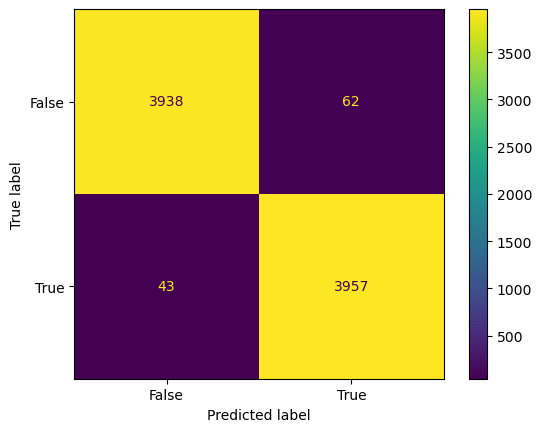

In [55]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = test_df_labels.to_numpy() 
predicted = LR.predict(test_df_features)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# USING 4 FEATURES

In [56]:
# removing some features [grabcut_mask_ones,max_area,RMS_cont,num_of_contours_using_threshhold] keeping only 4 features ['var', 'num_of_contours_using_masking', 'edges', 'bw_ratio']

del train_df_features['grabcut_mask_ones']
del train_df_features['max_area']
del train_df_features['RMS_cont']
del train_df_features['num_of_contours_using_threshhold']

del test_df_features['grabcut_mask_ones']
del test_df_features['max_area']
del test_df_features['RMS_cont']
del test_df_features['num_of_contours_using_threshhold']

In [58]:
test_df_features.columns

Index(['var', 'num_of_contours_using_masking', 'edges', 'bw_ratio'], dtype='object')

In [59]:
LR = LogisticRegression()
history = LR.fit(train_df_features,train_df_labels)

In [60]:
predection = LR.predict(test_df_features)
score = LR.score(test_df_features,test_df_labels)
print('Logistic Regression model accuracy: {:.3f}'.format(score))

Logistic Regression model accuracy: 0.988


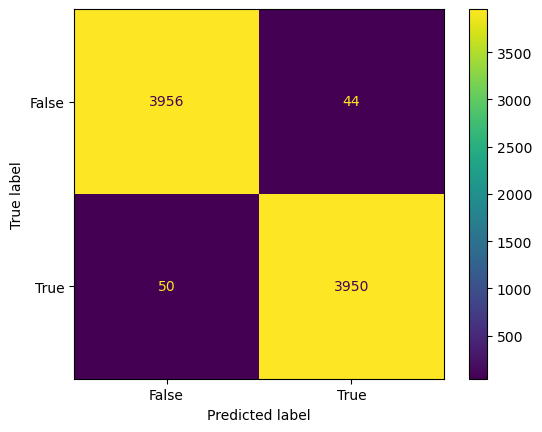

In [61]:
actual = test_df_labels.to_numpy() 
predicted = LR.predict(test_df_features)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# USING 2 FEATURES

In [62]:
# removing some features ['var', 'edges'] keeping only 2 features [ 'num_of_contours_using_masking', 'bw_ratio']
del train_df_features['var']
del train_df_features['edges']

del test_df_features['var']
del test_df_features['edges']

In [63]:
test_df_features.columns

Index(['num_of_contours_using_masking', 'bw_ratio'], dtype='object')

In [64]:
LR = LogisticRegression()
history = LR.fit(train_df_features,train_df_labels)

In [65]:
predection = LR.predict(test_df_features)
score = LR.score(test_df_features,test_df_labels)
print('Logistic Regression model accuracy: {:.3f}'.format(score))

Logistic Regression model accuracy: 0.976


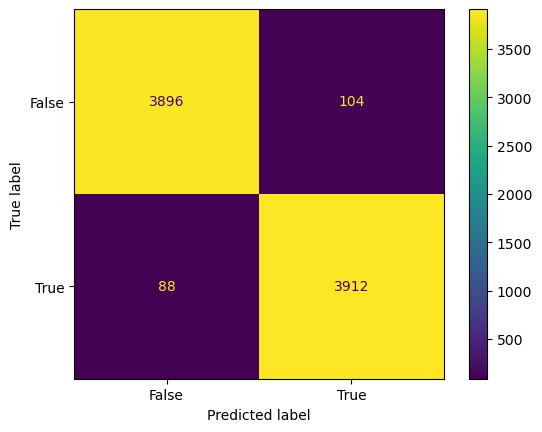

In [66]:
actual = test_df_labels.to_numpy() 
predicted = LR.predict(test_df_features)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()